In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Carrega les dades des del fitxer CSV
data = pd.read_csv('data/DS-2023-000/proxy-sql-dataset.csv', delimiter=";")

# Convertim les etiquetes de text a números (0 o 1)
label_encoder = LabelEncoder()
data['malignant'] = label_encoder.fit_transform(data['malignant'])

# Separem les dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(data['query'], data['malignant'], test_size=0.2, random_state=42)

# Tokenització i padding del text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=50, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=50, padding='post', truncating='post')

# Construeix el model amb una capa LSTM
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=50),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenament del model
model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))

# Avaluació del model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/5
1000/1000 [==============================] - 8s 7ms/step - loss: 0.6324 - accuracy: 0.5714 - val_loss: 0.6939 - val_accuracy: 0.5128
Epoch 2/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.6936 - accuracy: 0.5041 - val_loss: 0.6818 - val_accuracy: 0.5130
Epoch 3/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1209 - accuracy: 0.9517 - val_loss: 0.0322 - val_accuracy: 0.9911
Epoch 4/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.0258 - accuracy: 0.9943 - val_loss: 0.0204 - val_accuracy: 0.9956
Epoch 5/5
250/250 [==============================] - 1s 2ms/step - loss: 0.0219 - accuracy: 0.9955
Loss: 0.021922115236520767, Accuracy: 0.9955000281333923


Epoch 1/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.3753 - accuracy: 0.8358 - val_loss: 0.5883 - val_accuracy: 0.6545
Epoch 2/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.5597 - accuracy: 0.6777 - val_loss: 0.5674 - val_accuracy: 0.6676
Epoch 3/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.4952 - accuracy: 0.7388 - val_loss: 0.4159 - val_accuracy: 0.8079
Epoch 4/5
1000/1000 [==============================] - 7s 7ms/step - loss: 0.1164 - accuracy: 0.9603 - val_loss: 0.1528 - val_accuracy: 0.9660
Epoch 5/5
250/250 [==============================] - 1s 2ms/step


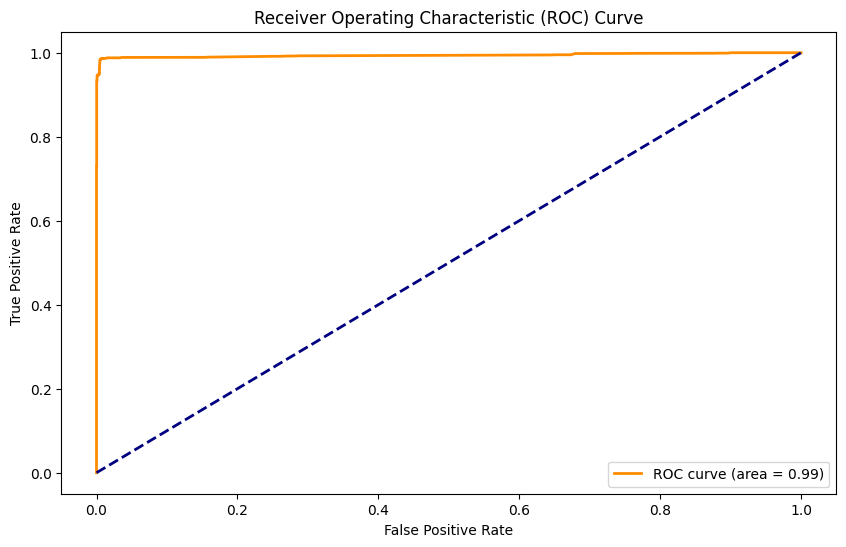

Accuracy: 0.9686
Confusion Matrix:
[[3891    3]
 [ 248 3858]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3894
           1       1.00      0.94      0.97      4106

    accuracy                           0.97      8000
   macro avg       0.97      0.97      0.97      8000
weighted avg       0.97      0.97      0.97      8000



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Carrega les dades des del fitxer CSV
data = pd.read_csv('data/DS-2023-000/proxy-sql-dataset.csv', delimiter=";")

# Convertim les etiquetes de text a números (0 o 1)
label_encoder = LabelEncoder()
data['malignant'] = label_encoder.fit_transform(data['malignant'])

# Separem les dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(data['query'], data['malignant'], test_size=0.2, random_state=42)

# Tokenització i padding del text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=50, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=50, padding='post', truncating='post')

# Construeix el model amb una capa LSTM
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=50),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenament del model
model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))

# Prediccions del model
y_pred = model.predict(X_test_padded)
y_pred_binary = (y_pred > 0.5).astype(int)

# Càlcul de mètriques
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Calcula la corba ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Visualitza la corba ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Mostra les mètriques
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')
